In [1]:
# - compatibility with Python 3
from __future__ import print_function  # print('me') instead of print 'me'
from __future__ import division  # 1/2 == 0.5, not 0

In [2]:
# - show figures inside the notebook
%matplotlib inline

In [3]:
# - import common modules
import numpy as np  # the Python array package
import matplotlib.pyplot as plt  # the Python plotting package

In [4]:
# - set gray colormap and nearest neighbor interpolation by default
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

In [5]:
# - nibabel package
import nibabel as nib

## Preliminaries

Check the code utilities are on your Python path:

In [6]:
# Check code import
import sys
import os
sys.path.append(os.path.join('..', 'for_exercises'))
from rotations import x_rotmat, y_rotmat, z_rotmat

## Your task...

I have taken a copy of the first volume in `ds107_sub012_t1r2.nii`.

In [7]:
# - the first volume of ds107_sub012_t1r2.nii
img_4d = nib.load('ds107_sub012_t1r2.nii')
data = img_4d.get_data()
vol0 = data[..., 0]

Then I rotated it by:

* 0.1 radians around the x axis, then
* 0.2 radians around the y axis, then
* 0.3 radians around the z axis.

In [8]:
# - the resulting rotated image
rotated_img = nib.load('rotated_volume.nii')
rotated_vol0 = rotated_img.get_data()
rotated_vol0.shape

(64, 64, 35)

Here are slices over z, y, and x, for rotated and not-rotated images

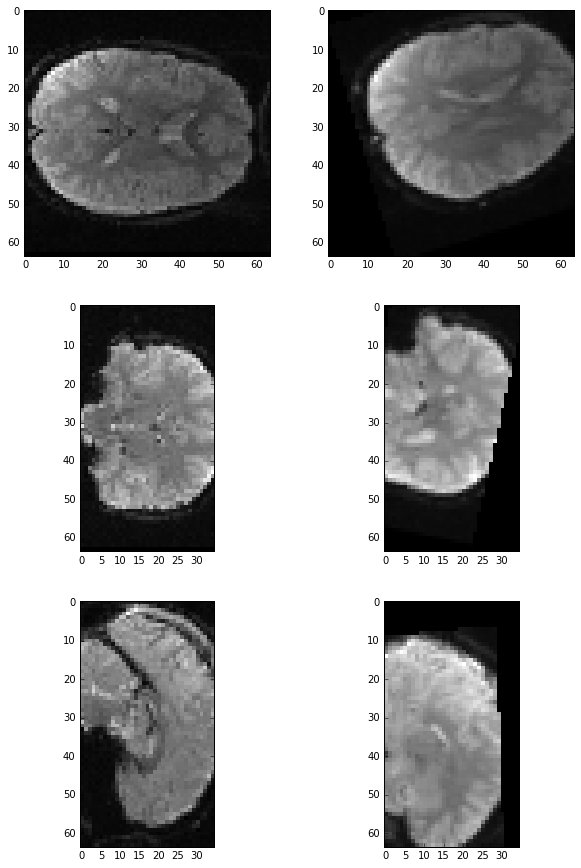

In [9]:
# - slices on z, y, and x axis from 
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes[0, 0].imshow(vol0[:, :, 17])
axes[0, 1].imshow(rotated_vol0[:, :, 17])
axes[1, 0].imshow(vol0[:, 31, :])
axes[1, 1].imshow(rotated_vol0[:, 31, :])
axes[2, 0].imshow(vol0[31, :, :])
axes[2, 1].imshow(rotated_vol0[31, :, :])

Of course, I have to be more specific by what I mean when I say that I rotated this image by:

* 0.1 radians around the x axis, then
* 0.2 radians around the y axis, then
* 0.3 radians around the z axis.

I am describing the mapping from coordinates in `vol0` to coordinates in `rotated_vol0`.

As you now know, in order to apply this rotation, I needed to do *pull resampling*, so I needed to use the mapping from coordinates in `rotated_vol0` to coordinates in `vol0`.  So *applying* this rotation involved: rotation of -0.3 radians around z, then -0.2 radians around y then -0.1 radians around x.

Your task, should you chose to accept it, is to make a new image, where you have undone the given rotations.

Let's remind ourselves of what we need to do.

In order to make the new fixed image, we will need to

1. Make a new empty image the same shape as the original;
2. For every coordinate $(i, j, k)$ in this new empty image, we are going to apply a transformation $t$.  This transformation will give us the corresponding coordinate $(i', j', k')$ in the `rotated_vol0`;
3. We use linear resampling to estimate a voxel value $v$ for coordinate $(i', j', k')$ in `rotated_vol0`;
4. We put this voxel value $v$ into the empty image at coordinate $(i, j, k)$.

In fact ``scipy.ndimage.affine_transform`` will do all these steps for us, but we need to supply the transformation $t$.

So - what transformation do we need?

We are doing pull resampling - so we want the mapping from coordinates in `vol0` to coordinates in `rotated_vol0`.

Your job is to make a 3 by 3 matrix that applies this mapping.

See: [wikipedia on Rotation matrices](http://en.wikipedia.org/wiki/Rotation_matrix)

This is the matrix that `scipy.ndimage.affine_transform` will use to get the transformation between coordinates in the new empty image and the corresponding coordinates in the rotated image.

In [10]:
# Make a 3 by 3 transformation matrix that applies this sequence
# * 0.1 radians around the x axis, then
# * 0.2 radians around the y axis, then
# * 0.3 radians around the z axis.
M = z_rotmat(0.3).dot(y_rotmat(0.2)).dot(x_rotmat(0.1))
M

array([[ 0.93629336, -0.27509585,  0.21835066],
       [ 0.28962948,  0.95642509, -0.03695701],
       [-0.19866933,  0.0978434 ,  0.97517033]])

Use `scipy.ndimage.affine_transform` to create the new image and use the transform to sample from the rotated image:

In [11]:
# Use affine_transform to resample from `rotated_vol0` using the transform
# Get the result into a variable `derotated_vol0`
from scipy.ndimage import affine_transform
derotated_vol0 = affine_transform(rotated_vol0, M)
derotated_vol0.shape

(64, 64, 35)

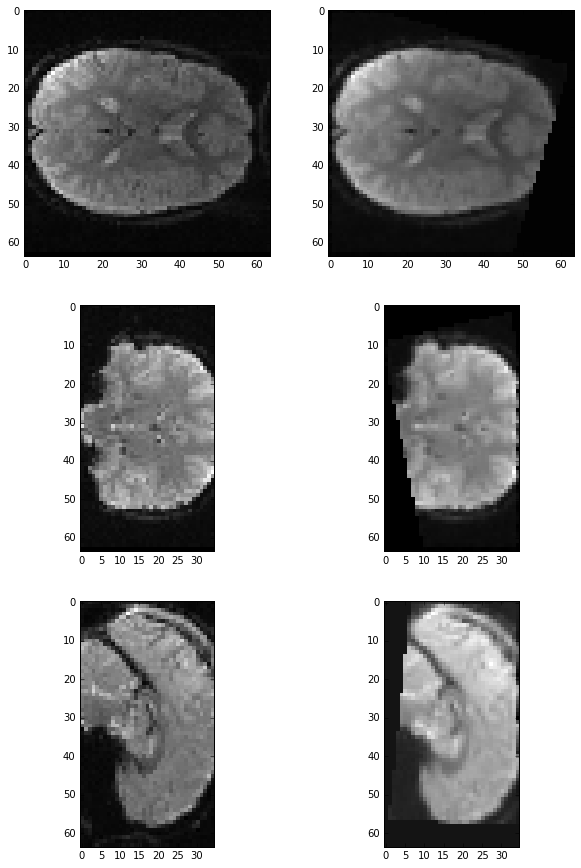

In [12]:
# - plot slices from the image to see if you got the right transformation
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes[0, 0].imshow(vol0[:, :, 17])
axes[0, 1].imshow(derotated_vol0[:, :, 17])
axes[1, 0].imshow(vol0[:, 31, :])
axes[1, 1].imshow(derotated_vol0[:, 31, :])
axes[2, 0].imshow(vol0[31, :, :])
axes[2, 1].imshow(derotated_vol0[31, :, :])